In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from fetch_finviz_stock_news import fetch_stock_news

# nltk.download('vader_lexicon')

tickers = ['AAPL', 'AMZN']
df = fetch_stock_news(tickers)
df.head()

,ticker,date,time,title
0,AAPL,Jun-02-24,10:10PM,Nvidia Stock in Focus After AI Darling Reveals...
1,AAPL,Jun-02-24,09:54PM,Apple's large user base will be biggest advant...
2,AAPL,Jun-02-24,09:44AM,The Least Productive Country in the World
3,AAPL,Jun-02-24,09:39AM,20 Least Productive Countries in the World
4,AAPL,Jun-02-24,08:30AM,Here's what's really bothering me about the ex...


In [2]:
df.tail(20)

,ticker,date,time,title
180,AMZN,May-30-24,04:11AM,Is Energy Transfer LP Unit (NYSE:ET) The Best ...
181,AMZN,May-30-24,04:06AM,10 Large-Cap Stocks American Politicians Are B...
182,AMZN,May-30-24,04:01AM,Amazon adds Grubhub food delivery to its websi...
183,AMZN,May-30-24,03:56AM,Is S&P Global Inc. (NYSE:SPGI) the Best Large-...
184,AMZN,May-30-24,03:10AM,The Country with the Most Inventions in All Hu...
185,AMZN,May-30-24,03:09AM,20 Countries with the Most Inventions in All H...
186,AMZN,May-30-24,02:58AM,Is Amazon (AMZN) the Best Large-Cap Stock AI S...
187,AMZN,May-30-24,02:48AM,7 Best Large-Cap Stocks to Buy in 2024 Accordi...
188,AMZN,May-30-24,02:00AM,Amazon expands Grubhub deal in food delivery push
189,AMZN,May-30-24,02:00AM,Customers can now order Grubhub delivery on Am...


In [6]:
df.shape

(200, 4)

In [5]:
df.iloc[0]['title']

'Nvidia Stock in Focus After AI Darling Reveals Next-Gen Chip'

In [7]:
# nltk.download('vader_lexicon')
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

df['compound'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])

f = lambda title: vader.polarity_scores(title)['compound']

df['compound'] = df['title'].apply(f)

df.head()

,ticker,date,time,title,compound
0,AAPL,Jun-02-24,10:10PM,Nvidia Stock in Focus After AI Darling Reveals...,0.5859
1,AAPL,Jun-02-24,09:54PM,Apple's large user base will be biggest advant...,0.2500
2,AAPL,Jun-02-24,09:44AM,The Least Productive Country in the World,0.0000
3,AAPL,Jun-02-24,09:39AM,20 Least Productive Countries in the World,0.0000
4,AAPL,Jun-02-24,08:30AM,Here's what's really bothering me about the ex...,-0.4391


In [9]:
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19232\4236482205.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date


,ticker,date,time,title,compound
0,AAPL,2024-06-02,10:10PM,Nvidia Stock in Focus After AI Darling Reveals...,0.5859
1,AAPL,2024-06-02,09:54PM,Apple's large user base will be biggest advant...,0.2500
2,AAPL,2024-06-02,09:44AM,The Least Productive Country in the World,0.0000
3,AAPL,2024-06-02,09:39AM,20 Least Productive Countries in the World,0.0000
4,AAPL,2024-06-02,08:30AM,Here's what's really bothering me about the ex...,-0.4391


In [10]:
df['time'] = pd.to_datetime(df['time'], format='%I:%M%p').dt.time
df.head()

,ticker,date,time,title,compound
0,AAPL,2024-06-02,22:10:00,Nvidia Stock in Focus After AI Darling Reveals...,0.5859
1,AAPL,2024-06-02,21:54:00,Apple's large user base will be biggest advant...,0.2500
2,AAPL,2024-06-02,09:44:00,The Least Productive Country in the World,0.0000
3,AAPL,2024-06-02,09:39:00,20 Least Productive Countries in the World,0.0000
4,AAPL,2024-06-02,08:30:00,Here's what's really bothering me about the ex...,-0.4391


In [16]:
mean_df = df.groupby(['ticker', 'date']).mean('compound')

In [18]:
mean_df

compound
ticker date                
AAPL   2024-05-29  0.035175
       2024-05-30  0.166632
       2024-05-31  0.152881
       2024-06-01  0.197536
       2024-06-02  0.186518
AMZN   2024-05-29 -0.019312
       2024-05-30  0.350552
       2024-05-31  0.140058
       2024-06-01  0.343660
       2024-06-02  0.362538

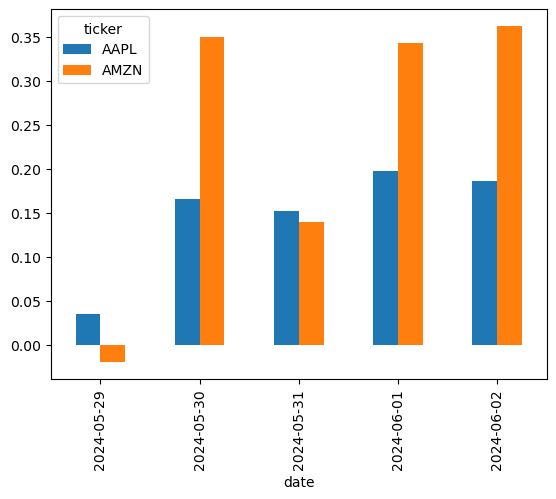

In [19]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()
